In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('synthetic.csv')
data.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
data.head()

,X,Y
0,37.454012,126.746701
1,95.071431,293.927975
2,73.199394,225.441700
3,59.865848,183.586508
4,15.601864,39.020372


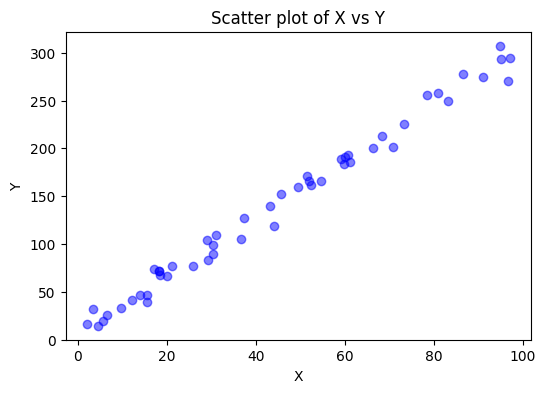

In [3]:
figure, ax = plt.subplots(figsize=(6, 4))
ax.scatter(data['X'], data['Y'], color='blue', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter plot of X vs Y')
plt.show()

OLS Method

In [4]:
# fit a linear model
model = ols('Y~X',data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4229.
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           1.84e-48
Time:                        11:27:15   Log-Likelihood:                -181.21
No. Observations:                  50   AIC:                             366.4
Df Residuals:                      48   BIC:                             370.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9669      2.426      3.284      0.0

LinearRegression from sklearn

In [5]:
X = data[['X']]
y = data['Y']
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"Intercept: {lin_reg.intercept_}, \nCoefficient: {lin_reg.coef_[0]}")
r2 = lin_reg.score(X, y)
print(f"R^2: {r2}")

Intercept: 7.966892744688863, 
Coefficient: 2.9776566003853104
R^2: 0.988776823805174


Do linear regression from scrach

In [7]:
# Manual linear regression (least squares) calculation
x = data['X'].values   # Convert to numpy array
y = data['Y'].values

# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate coefficients
n_cov = np.sum((x - x_mean) * (y - y_mean))
n_var = np.sum((x - x_mean) ** 2)
slope = n_cov / n_var   # it is the slope of the regression line
intercept = y_mean - slope * x_mean  # it is the intercept of the regression line

print(f"Manual calculation:\nIntercept: {intercept}\nSlope: {slope}")

# Calculate R^2
y_pred = intercept + slope * x
ss_total = np.sum((y - y_mean) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2_manual = 1 - (ss_res / ss_total)
print(f"R^2: {r2_manual}")

Manual calculation:
Intercept: 7.966892744688863
Slope: 2.9776566003853104
R^2: 0.988776823805174
